In [11]:
import numpy as np
import matplotlib.pyplot as plt

Определим простейшую выпуклую функцию

In [32]:
def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

Определим функцию, которая вычислит градиент:

In [2]:
def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

Также запрограммируем простейший вариант для градиентного спуска:

In [3]:
def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

Напишем функцию, которая будет строить график:

In [19]:
def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

Визуализируем и получим следующее движение градиентного спуска к минимуму:

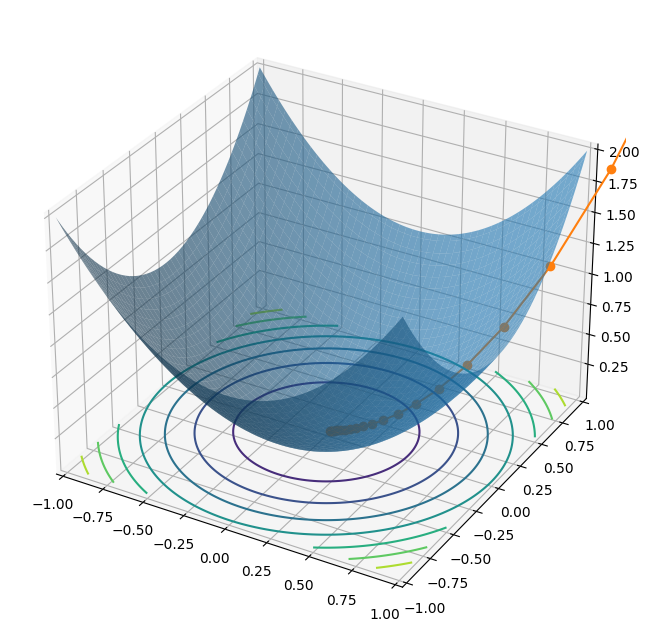

In [33]:
trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)

### Задание 7.7
Найдите следующую точку градиентного спуска для функции $f(x, y, z)=2x^2-4xz+4y^2-8yz+9z^2+4x+8y-20z$ , если текущая точка — $(0,0,0)$, $\alpha =0.25$. Введите координаты получившейся точки:

$$x_{n+1}=x_n - \alpha\nabla f(x_n)$$
пока не надо $$ + \gamma(x_n - x_{n-1})$$

In [39]:
import sympy
from sympy import *
m=np.array([0,0,0])
alf=0.25
x, y, z = symbols('x y z')
f=2*x**2-4*x*z+4*y**2-8*y*z+9*z**2+4*x+8*y-20*z
display(f)
f_x=f.diff(x)
print('f_x:',f_x)
f_y=f.diff(y)
print('f_y:',f_y)
f_z=f.diff(z)
print('f_z:',f_z)

print('x_{n+1}:',m[0]-alf*f_x.subs({x:m[0], y:m[1], z:m[2]}))
print('y_{n+1}:',m[1]-alf*f_y.subs({x:m[0], y:m[1], z:m[2]}))
print('z_{n+1}:',m[2]-alf*f_z.subs({x:m[0], y:m[1], z:m[2]}))

2*x**2 - 4*x*z + 4*x + 4*y**2 - 8*y*z + 8*y + 9*z**2 - 20*z

f_x: 4*x - 4*z + 4
f_y: 8*y - 8*z + 8
f_z: -4*x - 8*y + 18*z - 20
x_{n+1}: -1.00000000000000
y_{n+1}: -2.00000000000000
z_{n+1}: 5.00000000000000
